In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mlxtend.plotting import plot_decision_regions

# For Linear Dataset

In [91]:
dataset=pd.read_csv(r"/Users/princegupta/Documents/data science/dataset/placement_data.csv")

In [92]:
dataset.head(2)

,cgpa,score,placed
0,7.076327,6.373941,0
1,6.916728,6.255223,0


In [93]:
dataset.shape

(500, 3)

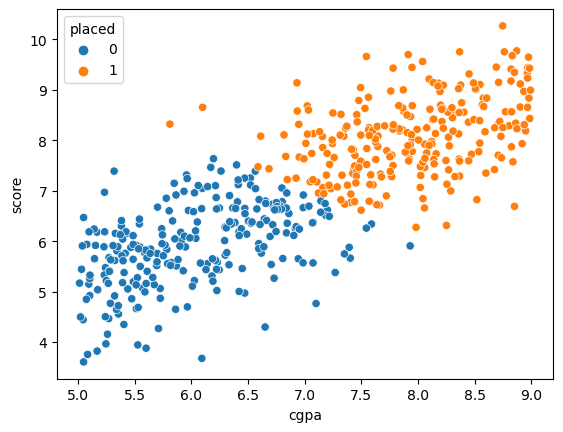

In [94]:
sns.scatterplot(x="cgpa",y="score",data=dataset,hue="placed")
plt.show()

In [95]:
x=dataset.iloc[:,:-1]
y=dataset["placed"]

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [98]:
"linear","poly","rbf","sigmoid","precomputed"

('linear', 'poly', 'rbf', 'sigmoid', 'precomputed')

In [99]:
from sklearn.svm import SVC

In [100]:
sv=SVC(kernel="linear")
sv.fit(x_train,y_train)

SVC(kernel='linear')

In [101]:
sv.score(x_train,y_train)*100,sv.score(x_test,y_test)*100

(100.0, 100.0)

/Users/princegupta/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


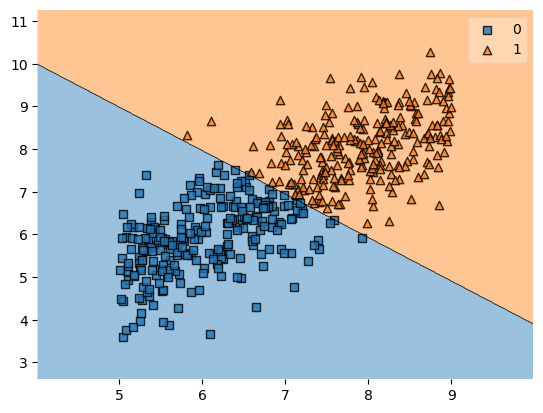

In [102]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=sv)
plt.show()

In [103]:
x_test,y_test

(         cgpa      score
 361  7.624647   8.025323
 73   8.451188   9.315227
 374  7.931206   5.906976
 155  8.747831  10.267737
 104  5.277695   5.412464
 ..        ...        ...
 347  5.789882   5.553498
 86   7.780578   9.430598
 75   5.382858   6.407671
 438  6.993023   7.633350
 15   5.030251   5.443003
 
 [100 rows x 2 columns],
 361    1
 73     1
 374    0
 155    1
 104    0
       ..
 347    0
 86     1
 75     0
 438    1
 15     0
 Name: placed, Length: 100, dtype: int64)

In [104]:
sv.predict([[ 7.624647,8.025323]])

/Users/princegupta/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([1])

In [105]:
sv.predict([[5.382858,6.407671]])

/Users/princegupta/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

# For NON Linear

In [106]:
dataset1=pd.read_csv(r"/Users/princegupta/Documents/data science/dataset/Social_Network_Ads.csv")

In [107]:
dataset1.head(2)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0


In [108]:
dataset1.drop(columns=["User ID","Gender"],inplace=True)

In [109]:
dataset1.head(2)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0


In [127]:
dataset1.shape

(116, 3)

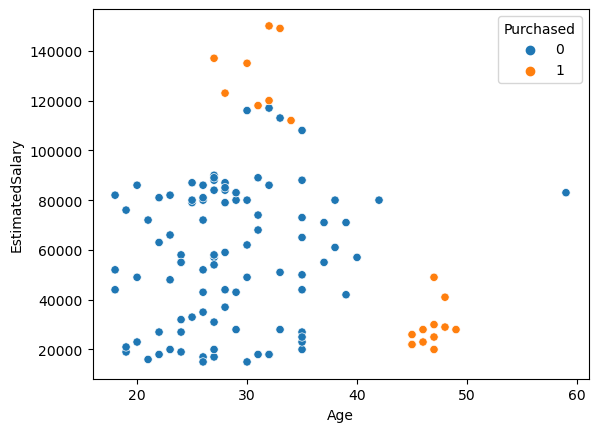

In [110]:
sns.scatterplot(x="Age",y="EstimatedSalary",data=dataset1,hue="Purchased")
plt.show()

In [111]:
x1=dataset1.iloc[:,:-1]
y1=dataset1["Purchased"]

In [112]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2,random_state=42)

In [113]:
from sklearn.preprocessing import StandardScaler

In [114]:
sc=StandardScaler()
x1_train_ss=sc.fit_transform(x1_train)
x1_test_ss=sc.transform(x1_test)

In [115]:
"linear","poly","rbf","sigmoid","precomputed"

('linear', 'poly', 'rbf', 'sigmoid', 'precomputed')

In [116]:
sv1=SVC(kernel="rbf")
sv1.fit(x1_train_ss,y1_train)

SVC()

In [117]:
sv1.score(x1_train_ss,y1_train)*100,sv1.score(x1_test_ss,y1_test)*100

(96.73913043478261, 100.0)

In [119]:
from sklearn.metrics import confusion_matrix

In [120]:
cf=confusion_matrix(y1_train,sv1.predict(x1_train_ss))
cf

array([[73,  2],
       [ 1, 16]])

In [121]:
cf1=confusion_matrix(y1_test,sv1.predict(x1_test_ss))
cf1

array([[21,  0],
       [ 0,  3]])

In [129]:
x1_test[10:15],y1_test[10:15]

(    Age  EstimatedSalary
 45   23            20000
 26   49            28000
 94   29            83000
 53   35            23000
 18   46            28000,
 45    0
 26    1
 94    0
 53    0
 18    1
 Name: Purchased, dtype: int64)

In [132]:
sv1.predict([[29,83000]])

array([0])